# Clustering I: El problema del Pintor (Color Quantization)

Un estudiante de pintura quiere realizar un cuadro como trabajo final de su curso. Entre los cuadros que puede escoger para el proyecto se encuentran:

* El jardin de las Delicias de Bosch
* El nacimiento de enuza de Boticelli
* La persistencia de la memoria de Dali.
* La For de Loto de Monet
* Las señoritas de Aviñón de Picaso.
* La noche estrellada de Van Gogh
* Las Meninas de Velazquez
* La chica de la perla de Vermeer

Sin embargo, debido a la situación de la cuarentena tiene mucho trabajo. El quiere un cuadro donde no tenga que utilizar más de 15 tonos diferentes, además quiere saber como se veria el cuadro resultante utilizando solamente esos 15 tonos. El ha escuchado que los alumnos de MACC pueden colaborarle utilizando algunas técnicas de Machine Learning. Es por esto que el ha pedido nuestra ayuda. Para esto, el contactó al profesor Alexander, quien decidió utilizar esta oportunidad para evaluar sus conocimientos en Clustering (agrupamiento). Para esto el profesor dividio el problema en las siguientes tareas:

1. Cargar los datos de las imagenes en Python usando la libreria cv2. Las imagenes se encuentran adjuntas en esta carpeta.
2. Utilizando sus conociientos en clustering identifiquen una paleta de colores adecuada, cumpliendo con la condicion de que no se deben obtener mas de 15 colores.
3. Una vez identificada la paleta de colores, utilicen esa infomración para evaluar como se veria visualmente la pintura si se utilizarán solo esos colores.
4. Con base en los resultados obtenidos identifiquen cual de las pinturas debería ser utilizada para el proyecto final del estudiante de pintura. Además porporcione la paleta de colores necesarios y una muestra visual de como luciría la pintura.

Como el objetivo es evaluar sus conocimientos en agrupamiento, el profesor Alexander también quiere que contesten las siguientes preguntas:

1. ¿Qué puede observar de los datos del problema?
2. ¿Se tuvó que realizar algun tipo de transformación a los datos?, ¿Porqué?
3. ¿Cuál fue el criterio para escoger la pintura que recomendará al estudiante para pintar?
4. ¿El algoritmo tuvo un performance similar para todas las pinturas, o no?, ¿Porqué se comporto así?
5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clustering y como se aplicó en este proyecto.

Finalmente, el profesor Alexander les pide que entreguen el notebook de jupyter con el código documentado con el análisis de cada una de las partes, es decir una explicación de que hace en cada parte del código; además, deben incluri las respuestas a las preguntas realizadas. Al entregar el notebook, por favor use la convención Grupo_ID_ML.

**Nota:** Recuerden que tienen hasta el **Martes 2 de Marzo** a las 12 de la noche para entregar sus notebooks. Mucha suerte!!


In [1]:
import cv2 as cv
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

Loading Image

### Pregunta 1

1. ¿Qué puede observar de los datos del problema?

Se puede observar que la imagen que posee 3 componentes, estop pues cada componente define un color de la escala RGB (Rojo,Verde,Azul). Dado que sucede esto es necesario ajustar los datos de tal manera que el algoritmo K-means pueda inferir correctamente los diferentes agrupamientos que existen en los datos las imagenes. Esto pues el algoritmo de k-means que vimos en clase solo funcionaba en dos dimensiones.

### Pregunta 2

2. ¿Se tuvó que realizar algun tipo de transformación a los datos?, ¿Porqué?

Si se tuve que realizar una transformacion a los datos, esto pues es necesario para que el algoritmos de Kmean pueda aprender correctamente las agrupaciones de los diferentes colores que representan la imagen. Se convirtio la imagen que es un tensor de (Ancho $\cdot$ Altura $\cdot$ 3), donde el 3 corresponde a el RGB a una matriz de (Ancho $\cdot$ altura,3).

## Scikit Learn

In [2]:
images = ["Bosch","Boticelli","Dali","Monet","Picaso","VanGogh","Velazquez"]

In [3]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [4]:
def get_img_one(n_colors,image):
        print("Analizando la imagen %s" %image)
        
        #Open Image
        im = cv.imread(cv.samples.findFile(f"{image}.jpg"))
        im_o = im.copy()
        
        if im is None:
            sys.exit("Could not read the image.")
        
        #Original Shape
        shape_original = im.shape
        
        #Image to array
        im = np.array(im, dtype=np.float64)/255
        
        #reshape imagen
        im = im.reshape((-1,3))
        
        #KMM
        kmeans = KMeans(n_clusters=n_colors)
        kmeans.fit(im)
        
        #BIC
        pred = kmeans.predict(im)
        
        new_im = recreate_image(kmeans.cluster_centers_, pred, shape_original[0], shape_original[1])
        
        L2 = sum(sum(shape_original-new_im)**2)
        print("La norma L2 es %s" %L2)

        #plot
        plt.imshow(new_im)
        plt.title(f"{image}")
        plt.show()

In [5]:
def get_img_onef(n_colors,image):
        print("Analizando la imagen %s" %image)
        
        #Open Image
        im = cv.imread(cv.samples.findFile(f"{image}.jpg"))
        im_o = im.copy()
        
        if im is None:
            sys.exit("Could not read the image.")
        
        #Original Shape
        shape_original = im.shape
        
        #Image to array
        im = np.array(im, dtype=np.float64)/255
        
        #reshape imagen
        im = im.reshape((-1,3))
        
        #KMM
        kmeans = KMeans(n_clusters=n_colors)
        kmeans.fit(im)
        
        #BIC
        #pred = kmeans.predict(im)
        
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        new_im = centers[labels].reshape(shape_original).astype('uint8')
        
        L2 = sum(sum(shape_original-new_im)**2)
        print("La norma L2 es %s" %L2)

        #plot
        plt.imshow(new_im)
        plt.title(f"{image}")
        plt.show()

In [ ]:
def get_img(n_colors,images):
    i=0
    for image in images:
        print("Analizando la imagen %s" %image)
        
        #Open Image
        im = cv.imread(cv.samples.findFile(f"{image}.jpg"))
        im_o = im.copy()
        
        if im is None:
            sys.exit("Could not read the image.")
        
        #Original Shape
        shape_original = im.shape
        
        #Image to array
        im = np.array(im, dtype=np.float64)/255
        
        #reshape imagen
        im = im.reshape((-1,3))
        
        #KMM
        kmeans = KMeans(n_clusters=n_colors)
        kmeans.fit(im)
        
        #BIC
        pred = kmeans.predict(im)
        
        new_im = recreate_image(kmeans.cluster_centers_, pred, shape_original[0], shape_original[1])
        
        L2 = sum(sum(shape_original-new_im)**2)
        print("La norma L2 es %s" %L2)

        #plot
        plt.figure(figsize = (20,60))
        plt.subplot(4, 2,i+1), plt.imshow(new_im)
        plt.title(f"{image}")
        i = i+1
        plt.show()
    return 

## Showing Images only on 15 colors

In [49]:
%%time
get_img(15,images)

Analizando la imagen Bosch


KeyboardInterrupt: 

Analizando la imagen VanGogh
La norma L2 es [         0          0 2026897408]


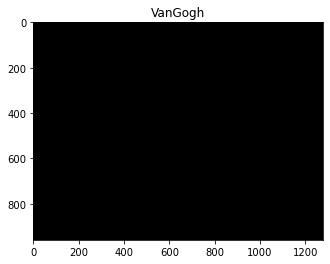

In [6]:
get_img_onef(15,"VanGogh")